# Potato Disease Classification

In [1]:
import os
os.mkdir('/kaggle/working/dataset')
out_paths = ['/kaggle/working/dataset/Potato___Early_blight',
            '/kaggle/working/dataset/Potato___Late_blight',
            '/kaggle/working/dataset/Potato___healthy']
for i in range(3):
    os.mkdir(out_paths[i])

In [2]:
# importing required packages
from pathlib import Path
import shutil
import os
import numpy as np
 
# defining source and destination
# paths
src = ['/kaggle/input/plant-village/PlantVillage/Potato___healthy',
      '/kaggle/input/plant-village/PlantVillage/Potato___Early_blight',
      '/kaggle/input/plant-village/PlantVillage/Potato___Late_blight']

trg = ['/kaggle/working/dataset/Potato___Early_blight',
            '/kaggle/working/dataset/Potato___Late_blight',
            '/kaggle/working/dataset/Potato___healthy']
 

 
# iterating over all the files in
# the source directory
for i in range(3):
    files=os.listdir(src[i])
    # copying the files to the
    # destination directory
    for fname in files:
        
        shutil.copy2(os.path.join(src[i],fname), trg[i])
print("Done")

Done


### Import all the Dependencies

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')

for gpu in physical_devices:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
len(physical_devices)

2

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [6]:
IMAGE_SIZE = 256
CHANNELS = 3
BATCH = 32

In [7]:
train, val = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/working/dataset',
    batch_size=BATCH,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='both',
)

Found 2152 files belonging to 3 classes.
Using 1722 files for training.
Using 430 files for validation.


In [8]:
len(val)

14

In [9]:
test = train.take(int(len(train)*0.25))
len(test)

13

In [10]:
class_names=train.class_names

## Building the Model

In [11]:
resize_and_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [12]:
input_shape = (BATCH,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    #layers.InputLayer(input_shape=input_shape),
    resize_and_scale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    train,
    batch_size=BATCH,
    validation_data=val,
    epochs=20,
)

Epoch 1/20
54/54 [==============================] - 18s 105ms/step - loss: 0.9295 - accuracy: 0.4884 - val_loss: 0.8927 - val_accuracy: 0.5256
Epoch 2/20
54/54 [==============================] - 5s 77ms/step - loss: 0.7687 - accuracy: 0.6330 - val_loss: 0.5206 - val_accuracy: 0.7651
Epoch 3/20
54/54 [==============================] - 4s 75ms/step - loss: 0.4279 - accuracy: 0.8078 - val_loss: 0.3912 - val_accuracy: 0.8163
Epoch 4/20
54/54 [==============================] - 4s 75ms/step - loss: 0.3507 - accuracy: 0.8508 - val_loss: 0.3421 - val_accuracy: 0.8349
Epoch 5/20
54/54 [==============================] - 4s 73ms/step - loss: 0.3095 - accuracy: 0.8693 - val_loss: 0.3819 - val_accuracy: 0.8419
Epoch 6/20
54/54 [==============================] - 4s 75ms/step - loss: 0.3044 - accuracy: 0.8757 - val_loss: 0.3137 - val_accuracy: 0.8605
Epoch 7/20
54/54 [==============================] - 4s 73ms/step - loss: 0.2413 - accuracy: 0.9053 - val_loss: 0.2671 - val_accuracy: 0.8907
Epoch 8/20


In [16]:
scores = model.evaluate(test)

13/13 [==============================] - 1s 40ms/step - loss: 0.0979 - accuracy: 0.9688


Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

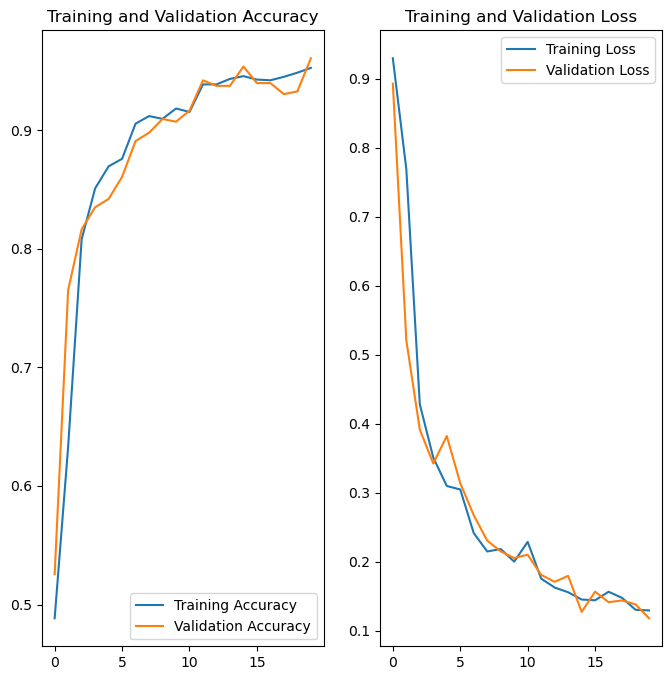

In [19]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 0s 171ms/step
predicted label: Potato___healthy


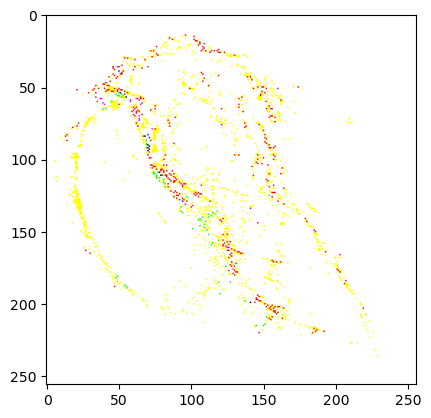

In [20]:
import numpy as np


for image_batch, labels_batch in test:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [21]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 21ms/step


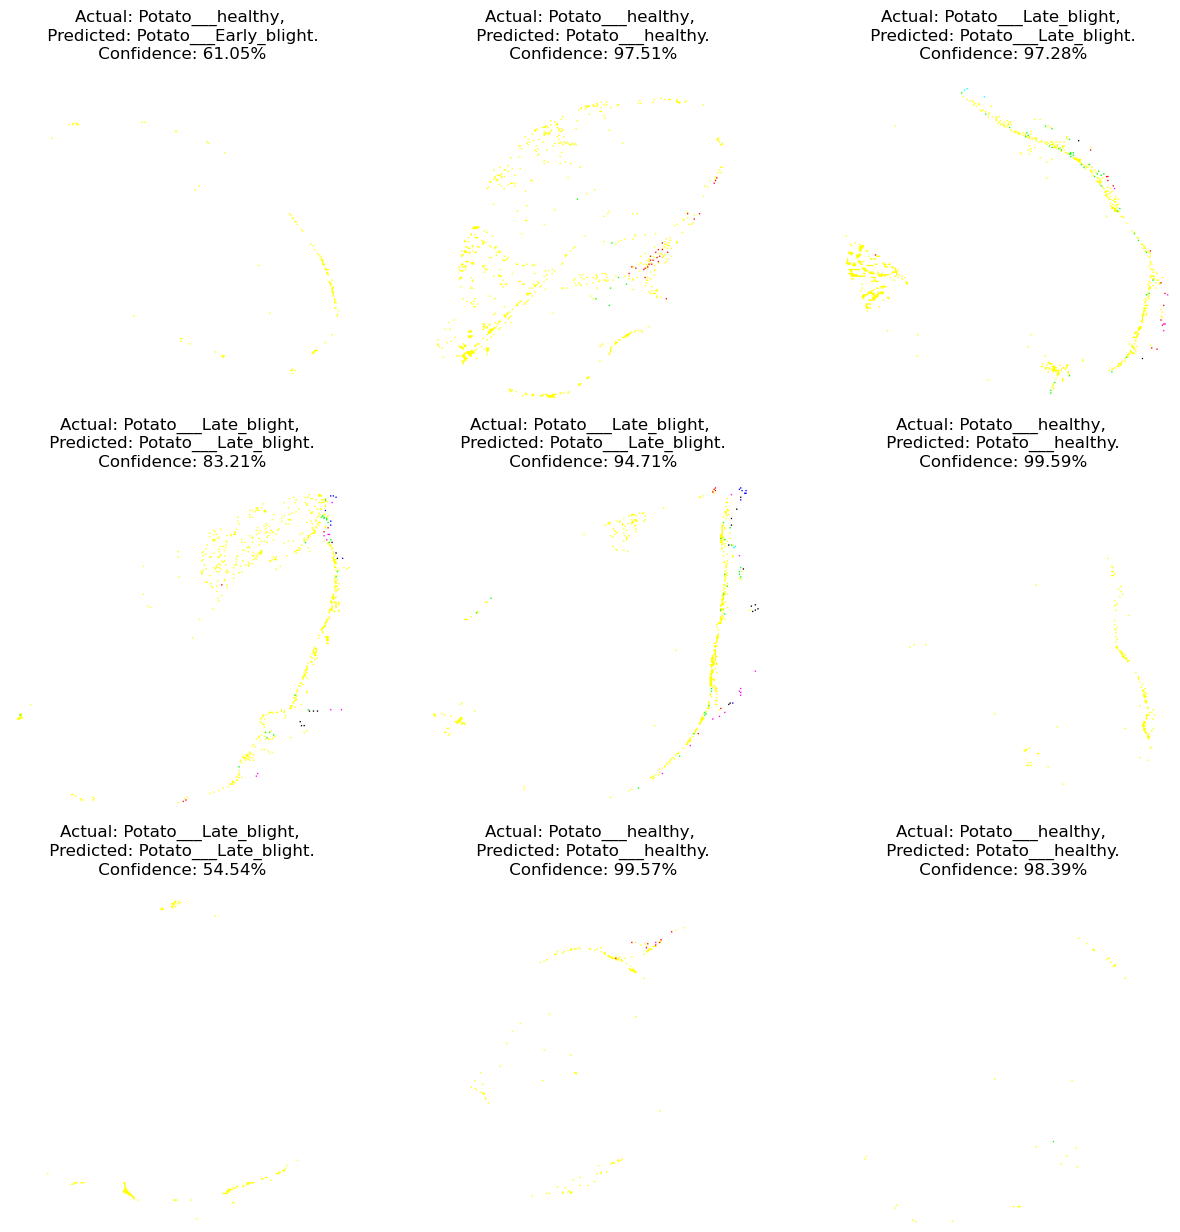

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in test:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [23]:
#model.save("../potatoes.h5")